In [10]:
import os
import csv
import json
import math
import torch
import argparse
import difflib
import logging
import numpy as np
import pandas as pd
import argparse
import matplotlib.pyplot as plt

In [2]:
ORIGINAL_PATH = 'data/crows_pairs_anonymized.csv'
# seed_list = [1,2,3]
seed_list = [1]
split_size_list = [2,3,4,5]

In [ ]:
for seed in seed_list:
    np.random.seed(seed)
    df = pd.read_csv(ORIGINAL_PATH)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    for no_of_split in split_size_list:
        shuffled = df.sample(frac=1)
        result = np.array_split(shuffled, no_of_split)  
        for i, result_split in enumerate(result):
            result_split.to_csv("data/crows_pairs_seed_{}_splitsize_{}_splitno_{}".format(seed,no_of_split,i))
            print("Split obtained for seed: {}, split size: {} split no:{},".format(seed,no_of_split,i))

In [ ]:
for split_size in split_size_list:
    for seed in seed_list:
        for splitno in range(0,split_size):
            input_file = "data/crows_pairs_seed_{}_splitsize_{}_splitno_{}".format(seed,split_size,splitno)
            lm_model = "bert"
            output_file = "crows_pairs_seed_{}_splitsize_{}_splitno_{}.csv".format(seed,split_size,splitno)
            !python metric.py --input_file {input_file} --lm_model {lm_model}  --output_file {output_file}

In [6]:
# Generation of box plots
exp_name = "bert"
data = []
x_labels = []
for no_of_split in split_size_list:
    text_file = "data/{}_{}.txt".format(exp_name,no_of_split)
    try: 
        with open(text_file) as f:
             lines = f.readlines() # format of lines: metric score, stereo , anti stereo, neutral
        stereo_scores = [float(line.split()[1]) for line in lines] # plotting for stereo scores
        data.append(stereo_scores)
        x_labels.append(no_of_split)
    except Exception as error:
        print("Error for file {}, {}".format(text_file,error))
        continue

Error for file data/bert_4.txt, [Errno 2] No such file or directory: 'data/bert_4.txt'
Error for file data/bert_5.txt, [Errno 2] No such file or directory: 'data/bert_5.txt'


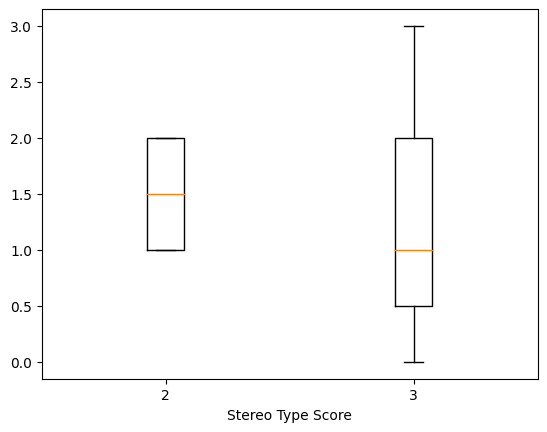

In [14]:
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(x_labels)
ax.set_xlabel("No of Splits")
ax.set_xlabel("Stereo Type Score")
plt.show()